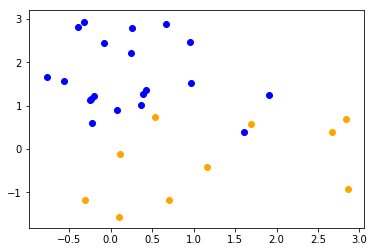

In [53]:
import numpy as np
import matplotlib.pyplot as plt

mean_a = np.array([1.5, 0])

cov = np.eye(2)

a = np.random.multivariate_normal(mean_a,cov,10)

plt.scatter(a[:,0],a[:,1], c='orange')

b = np.random.multivariate_normal(mean_a[::-1],cov,20)

plt.scatter(b[:,0],b[:,1],c='blue')

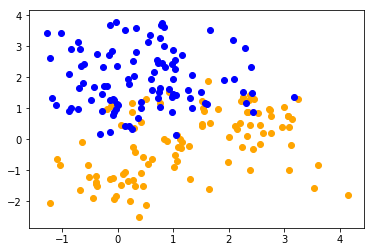

In [54]:
indices = np.random.randint(0,10,200)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,200)
x = np.append(a[indices[:100]], b[indices[100:]], 0) + noise 
y = np.append(np.zeros(100), np.ones(100))

plt.scatter(x[:100,0], x[:100,1],c='orange')

plt.scatter(x[100:,0], x[100:,1],c='blue')


In [55]:
import numpy.linalg as LA
def lls(x,y):
    X_hat = np.hstack((np.ones((x.shape[0],1)), x))
    b = np.dot(X_hat.T, y)
    q, r = LA.qr(np.dot(X_hat.T, X_hat))
    p = np.dot(q.T, b)
    alpha = np.dot(LA.inv(r), p)
    return alpha


In [56]:
#applies linear map alpha to x
#Values x have to be passed as n times 2 array
def apply(alpha,x):
    x_hat = np.hstack((np.ones((x.shape[0],1)), x))
    return np.dot(x_hat, alpha)

def PlotContourLine(func, value=0):
    #This plots the contourline func(x) = value
    
    samplenum = 1000
    minx = 2
    maxx = 8
    miny = 2
    maxy = 5
    xrange = np.arange(minx, maxx, (maxx-minx)/samplenum)
    yrange = np.arange(miny, maxy, (maxy-miny)/samplenum)
    
    #This generates a two-dimensional mesh
    X, Y = np.meshgrid(xrange,yrange)
    
    argsForf = np.array([X.flatten(),Y.flatten()]).T
    Z = func(argsForf)
    Z = np.reshape(Z,X.shape)
    
    plt.xlim(minx, maxx)
    plt.ylim(miny, maxy)
    plt.xlabel(r'$x_1$')
    plt.ylabel(r'$x_2$')
    #plt.contour(X, Y, Z, alpha=0.5,levels=[value],linestyles='dashed',linewidths=3)
    Z = np.where(Z > value, 1, -1)
    plt.contourf(X, Y, Z, alpha=0.2, colors=('red', 'blue'))

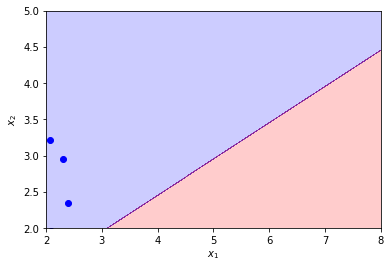

In [57]:
alpha = lls(x,y)
f = lambda x: apply(alpha,x)

PlotContourLine(func=f,value=0.5)

plt.scatter(x[:100,0], x[:100,1],c='orange')

plt.scatter(x[100:,0], x[100:,1],c='blue')

In [58]:
#the vector y is the ground truth for the test points x. 
#In particular we need the length of y to be the same as the length of x.
def compute_confusion_matrix(x, y):
    n = x.shape[1]
    print(n)
    c = np.empty((n,n))
    y_predicted = np.rint(np.clip(f(x), 0, 1))
    for i in range(0, n):
        for j in range(0, n):
            c[i,j] = np.sum(np.logical_and(y_predicted == i, y == j))
    return c

c = compute_confusion_matrix(x,y)
print("The confusion matrix for our training data is:\n" ,c)
print("The accuracy of the model is: ",  np.trace(c)/x.shape[0])



2
The confusion matrix for our training data is:
 [[91. 15.]
 [ 9. 85.]]
The accuracy of the model is:  0.88


In [18]:
indices = np.random.randint(0,10,20000)
noise = np.random.multivariate_normal(np.zeros(2),0.25*cov,20000)

x_test = np.append(a[indices[:10000]], b[indices[10000:]], 0) + noise 
y_test = np.append(np.zeros(10000), np.ones(10000))

c_test = compute_confusion_matrix(x_test, y_test)
print("The confusion matrix for our test data is:\n" ,c_test)
print("The accuracy of the model is: ",  np.trace(c_test)/x_test.shape[0])

The confusion matrix for our test data is:
 [[9437. 2261.]
 [ 563. 7739.]]
The accuracy of the model is:  0.8588


The accuracy of the model decreased on the test set as expected, since
by construction the seperating hyperplane minimizes the error only on the training set.

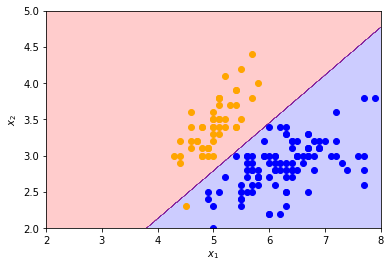

In [59]:
import pandas as pd
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
irisDataFrame = pd.read_csv(url, header=None)

x = irisDataFrame.values[:,:2]
y = irisDataFrame.values[:,4] != 'Iris-setosa'

alpha = lls(x,y)
f = lambda x: apply(alpha,x)

num_setosa = np.where(y==1)[0][0]

PlotContourLine(func=f,value=0.5)
plt.scatter(x[:num_setosa,0], x[:num_setosa,1],c='orange')
plt.scatter(x[num_setosa:,0], x[num_setosa:,1],c='blue')



In [60]:
x = irisDataFrame.values[:,:4]


[[5.1 3.5 1.4 0.2]
 [4.9 3.0 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.0 3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.0 3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.0 1.4 0.1]
 [4.3 3.0 1.1 0.1]
 [5.8 4.0 1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.0 0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.0 3.0 1.6 0.2]
 [5.0 3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.0 3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.1 1.5 0.1]
 [4.4 3.0 1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.0 3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.0 3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.0 1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.0 3.3 1.4 0.2]
 [7.0 3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.